In [1]:
import matplotlib.pyplot as plt

import pandas as pd

import seaborn as sns

import pickle as pkl

import numpy as np

from sklearn import svm

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifier

from sklearn.model_selection import train_test_split, GridSearchCV

from xgboost import XGBClassifier

from sklearn.preprocessing import Normalizer

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

In [2]:
df = pd.read_excel(r'C:\Users\jagadeesh\Desktop\Liver-Cirrhosis-Stage-Prediction-main\HealthCareData.xlsx')

df.head()

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
0,1,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
1,2,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
2,3,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
3,4,55,male,rural,12,2,branded liquor,negative,negative,NO,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
4,5,55,Female,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 42 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   S.NO                                                                     950 non-null    int64  
 1   Age                                                                      950 non-null    int64  
 2   Gender                                                                   950 non-null    object 
 3   Place(location where the patient lives)                                  816 non-null    object 
 4   Duration of alcohol consumption(years)                                   950 non-null    int64  
 5   Quantity of alcohol consumption (quarters/day)                           950 non-null    int64  
 6   Type of alcohol consumed                                                 9

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
0,0.000000,0.479167,0.666667,0.666667,0.195122,0.005587,0.666667,0.5,0.5,1.0,...,0.4375,0.603448,0.099526,0.103448,0.25,0.626667,0.139535,0.056995,0.0,0.0
1,0.001054,0.479167,0.666667,0.666667,0.195122,0.005587,0.666667,0.5,0.5,1.0,...,0.4375,0.603448,0.099526,0.103448,0.25,0.626667,0.139535,0.056995,0.0,0.0
2,0.002107,0.479167,0.666667,0.666667,0.195122,0.005587,0.666667,0.5,0.5,1.0,...,0.4375,0.603448,0.099526,0.103448,0.25,0.626667,0.139535,0.056995,0.0,0.0
3,0.003161,0.479167,0.666667,0.666667,0.195122,0.005587,0.666667,0.5,0.5,0.0,...,0.4375,0.603448,0.099526,0.103448,0.25,0.626667,0.139535,0.056995,0.0,0.0
4,0.004215,0.479167,0.000000,0.666667,0.195122,0.005587,0.666667,0.5,0.5,1.0,...,0.4375,0.603448,0.099526,0.103448,0.25,0.626667,0.139535,0.056995,0.0,0.0


In [5]:
normalized_full_df['Gender'].unique()

array([0.66666667, 0.        , 1.        , 0.33333333])

In [6]:
normalized_full_df.isnull().any()

S.NO                                                                       False
Age                                                                        False
Gender                                                                     False
Place(location where the patient lives)                                    False
Duration of alcohol consumption(years)                                     False
Quantity of alcohol consumption (quarters/day)                             False
Type of alcohol consumed                                                   False
Hepatitis B infection                                                      False
Hepatitis C infection                                                      False
Diabetes Result                                                            False
Blood pressure (mmhg)                                                      False
Obesity                                                                    False
Family history of cirrhosis/

In [7]:
df.isnull().sum()

S.NO                                                                         0
Age                                                                          0
Gender                                                                       0
Place(location where the patient lives)                                    134
Duration of alcohol consumption(years)                                       0
Quantity of alcohol consumption (quarters/day)                               0
Type of alcohol consumed                                                     0
Hepatitis B infection                                                        0
Hepatitis C infection                                                        0
Diabetes Result                                                              0
Blood pressure (mmhg)                                                        0
Obesity                                                                      0
Family history of cirrhosis/ hereditary             

In [8]:
categorical_features = df.select_dtypes(include=[np])
categorical_features.columns

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\dtypes\common.py:1645: DeprecationWarning: in the future the `.dtype` attribute of a given datatype object must be a valid dtype instance. `data_type.dtype` may need to be coerced using `np.dtype(data_type.dtype)`. (Deprecated NumPy 1.20)
  npdtype = np.dtype(dtype)


Index(['Gender', 'Place(location where the patient lives)',
       'Type of alcohol consumed', 'Hepatitis B infection',
       'Hepatitis C infection', 'Diabetes Result', 'Blood pressure (mmhg)',
       'Obesity', 'Family history of cirrhosis/ hereditary', 'TG', 'LDL',
       'Total Bilirubin    (mg/dl)', 'A/G Ratio',
       'USG Abdomen (diffuse liver or  not)',
       'Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)'],
      dtype='object')

<Axes: ylabel='Eosinophils   (%)'>

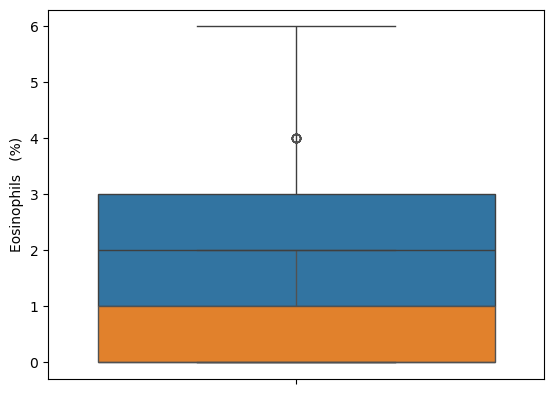

In [9]:
q1 = df['Eosinophils   (%)'].quantile(0.25)

q3= df['Eosinophils   (%)'].quantile(0.75)

iqr=q3-q1

q1,q3,iqr

upper_limit =q3+ (1.5*iqr)

lower_limit =q1 -(1.5*iqr)

lower_limit, upper_limit

df['Eosinophils   (%)'] = np.where(df['Eosinophils   (%)'] > upper_limit, upper_limit,

np.where(df['Eosinophils   (%)'] < lower_limit, lower_limit,df['Eosinophils   (%)']))

sns.boxplot(df['Eosinophils   (%)'])

sns.boxplot(df['Basophils  (%)'])                                   

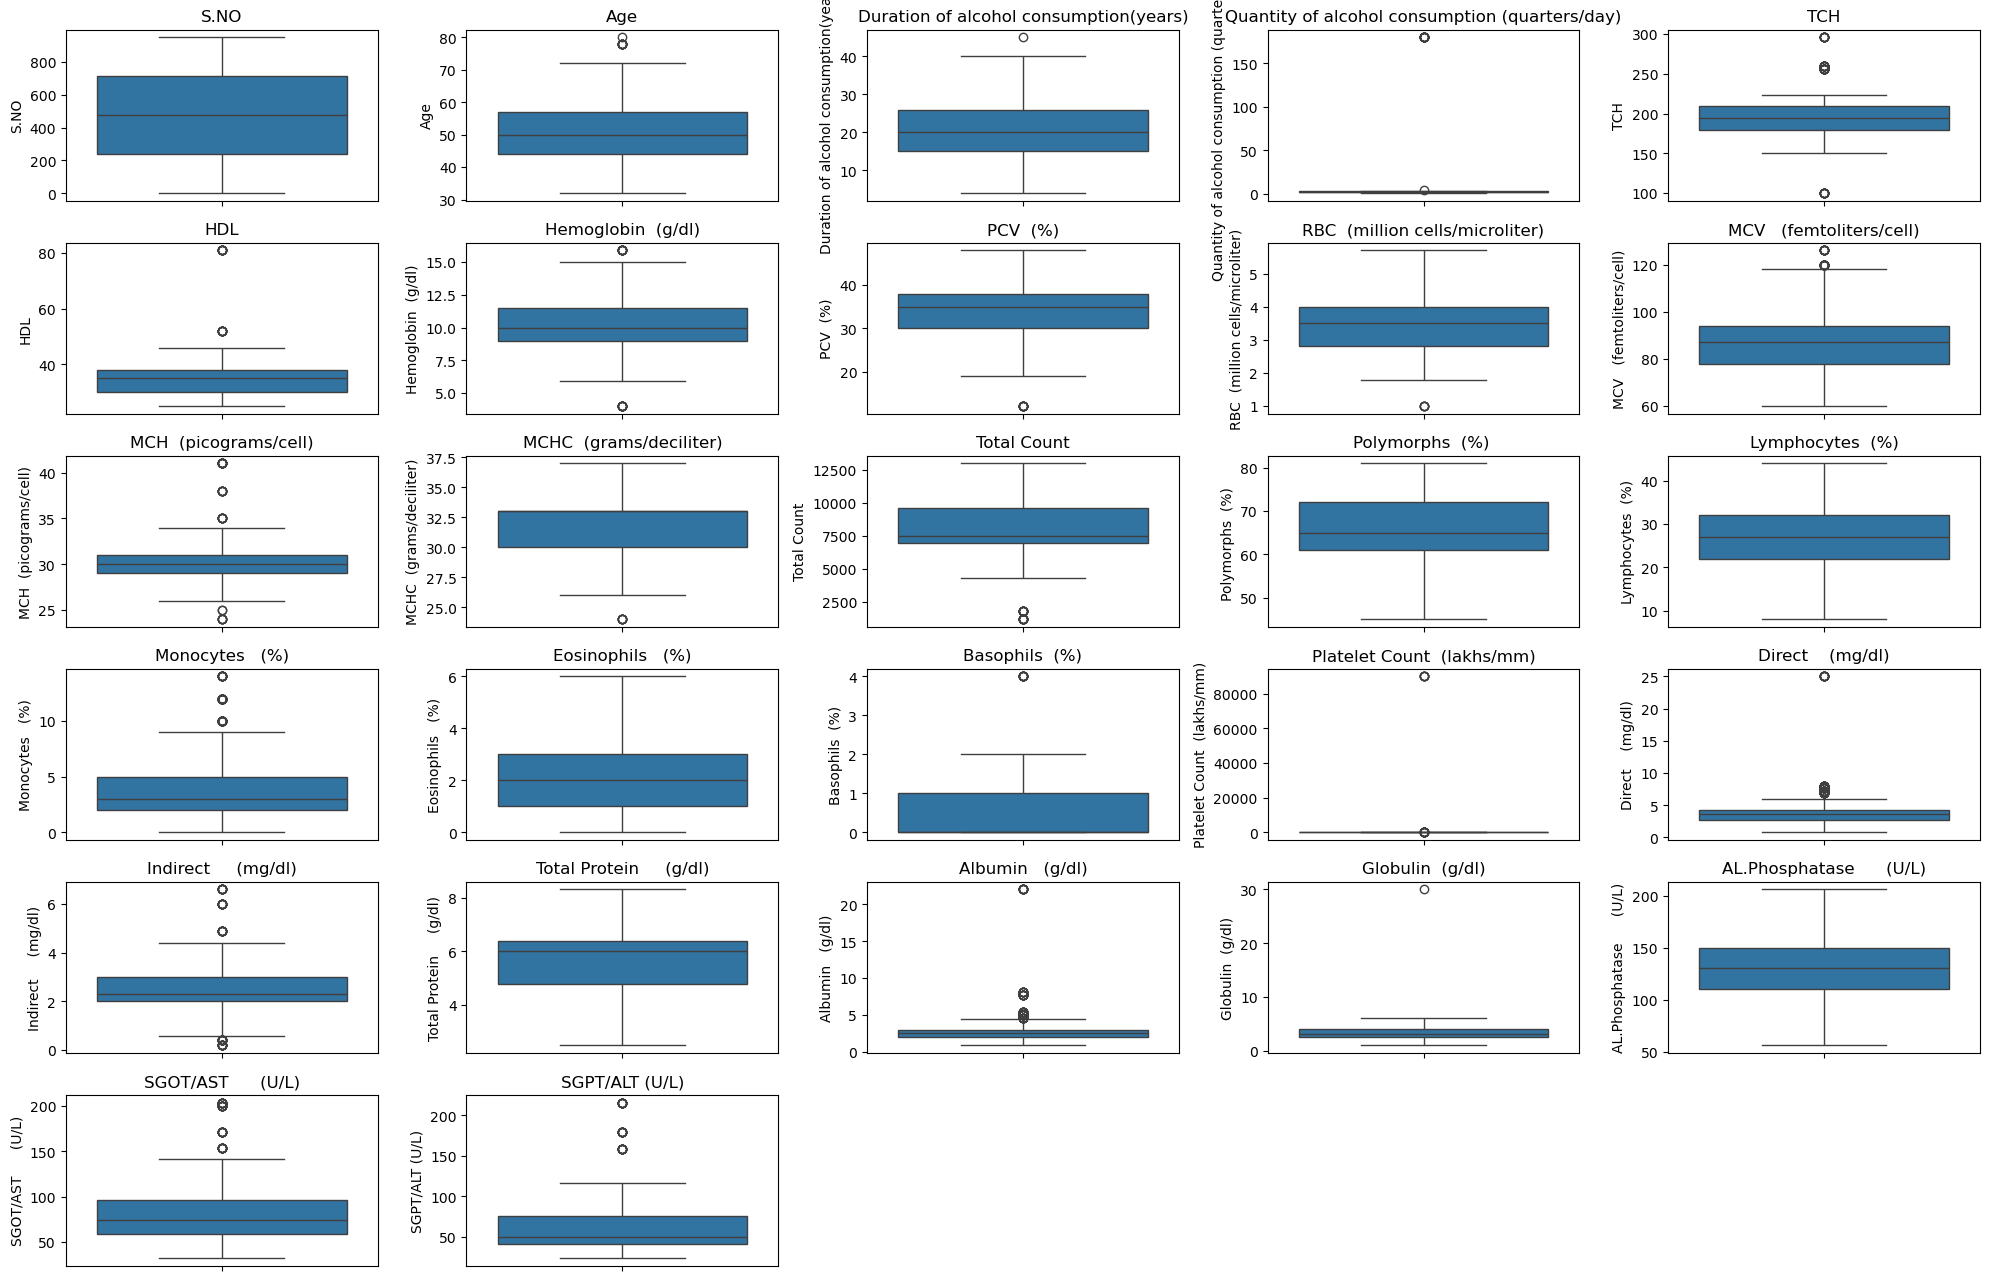

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

c = 0
plt.figure(figsize=(20, 15))

for i in df.columns:
    if pd.api.types.is_numeric_dtype(df[i]):
        plt.subplot(7, 5, c + 1)
        sns.boxplot(y=df[i])  # Use y=df[i] to avoid deprecation warnings
        plt.title(i)
        c += 1

plt.tight_layout()
plt.show()

In [11]:
q1= normalized_full_df['Eosinophils   (%)'].quantile(0.25)
q3= normalized_full_df['Eosinophils   (%)'].quantile(0.75)

iqr=q3-q1

q1,q3,iqr

upper_limit =q3+ (1.5*iqr)

lower_limit= q1 -(1.5*iqr)
                                                                                                     
lower_limit, upper_limit

df['Eosinophils   (%)'] = np.where(df['Eosinophils   (%)'] > upper_limit, upper_limit,
                                np.where(df['Eosinophils   (%)'] < lower_limit, lower_limit, df['Eosinophils   (%)']))

<Axes: ylabel='Eosinophils   (%)'>

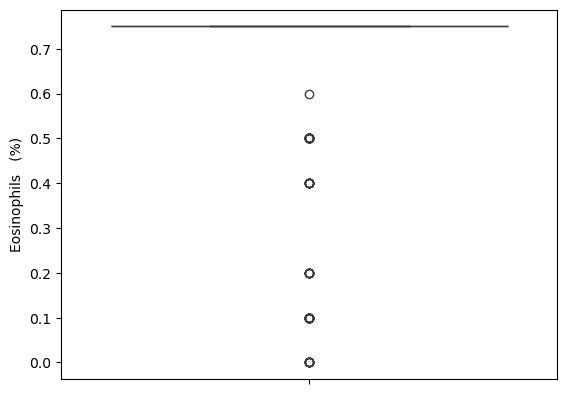

In [12]:
sns.boxplot(df['Eosinophils   (%)'])

<Axes: ylabel='Basophils  (%)'>

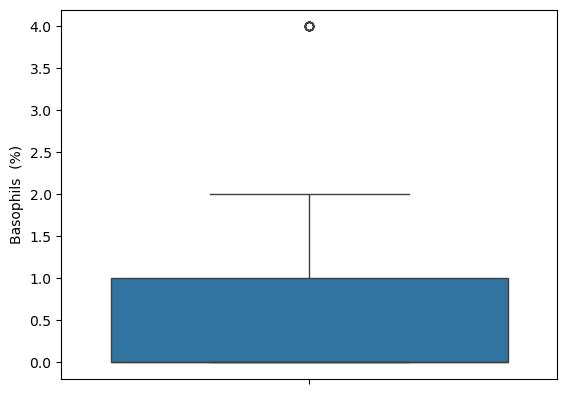

In [13]:
sns.boxplot(df['Basophils  (%)'])

In [14]:
q1= df['Basophils  (%)'].quantile(0.25)
q3=df['Basophils  (%)'].quantile(0.75)
igr=q3 - q1
q1,q3,iqr
upper_limit =q3 +(1.5*iqr)
lower_limit = q1 -(1.5*iqr)
lower_limit, upper_limit
df['Basophils  (%)'] = np.where(df[ 'Basophils  (%)'] > upper_limit, upper_limit,
                               np.where(df['Basophils  (%)']< lower_limit, lower_limit, df[ 'Basophils  (%)']))

<Axes: ylabel='Basophils  (%)'>

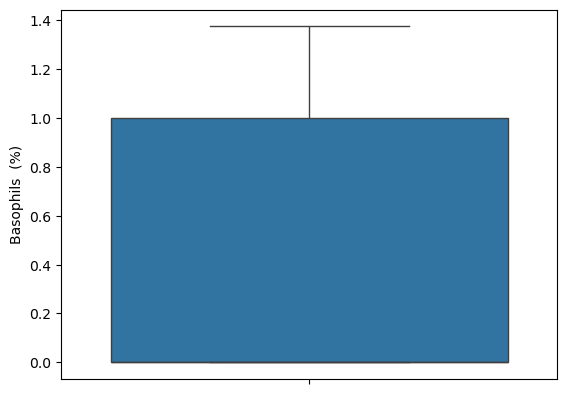

In [15]:
sns.boxplot(df['Basophils  (%)'])

<Axes: ylabel='Platelet Count  (lakhs/mm)'>

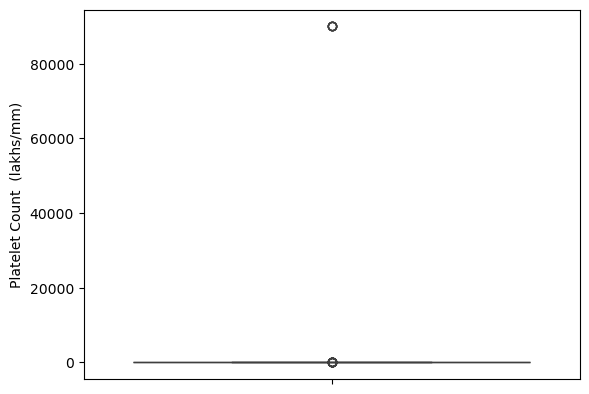

In [16]:
sns.boxplot(df['Platelet Count  (lakhs/mm)'])

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_excel(r'C:\Users\jagadeesh\Desktop\Liver-Cirrhosis-Stage-Prediction-main\HealthCareData.xlsx')

# Check column names
print(df.info())
df['Gender'] = df['Gender'].replace('male',0).replace('Female',1).replace('Female ',1).replace('transgender',2)

# Split into features and target
X = df.drop('Gender', axis=1)  # Drop the target column from features
y = df['Gender']               # Select the target column

# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
    )

# Check shapes of the splits
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("Y_train shape:", y_train.shape)
print("Y_test shape:", y_test.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 42 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   S.NO                                                                     950 non-null    int64  
 1   Age                                                                      950 non-null    int64  
 2   Gender                                                                   950 non-null    object 
 3   Place(location where the patient lives)                                  816 non-null    object 
 4   Duration of alcohol consumption(years)                                   950 non-null    int64  
 5   Quantity of alcohol consumption (quarters/day)                           950 non-null    int64  
 6   Type of alcohol consumed                                                 9

C:\Users\jagadeesh\AppData\Local\Temp\ipykernel_89344\2040197507.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace('male',0).replace('Female',1).replace('Female ',1).replace('transgender',2)


In [18]:
print(df.columns)

Index(['S.NO', 'Age', 'Gender', 'Place(location where the patient lives)',
       'Duration of alcohol consumption(years)',
       'Quantity of alcohol consumption (quarters/day)',
       'Type of alcohol consumed', 'Hepatitis B infection',
       'Hepatitis C infection', 'Diabetes Result', 'Blood pressure (mmhg)',
       'Obesity', 'Family history of cirrhosis/ hereditary', 'TCH', 'TG',
       'LDL', 'HDL', 'Hemoglobin  (g/dl)', 'PCV  (%)',
       'RBC  (million cells/microliter)', 'MCV   (femtoliters/cell)',
       'MCH  (picograms/cell)', 'MCHC  (grams/deciliter)', 'Total Count',
       'Polymorphs  (%) ', 'Lymphocytes  (%)', 'Monocytes   (%)',
       'Eosinophils   (%)', 'Basophils  (%)', 'Platelet Count  (lakhs/mm)',
       'Total Bilirubin    (mg/dl)', 'Direct    (mg/dl)',
       'Indirect     (mg/dl)', 'Total Protein     (g/dl)', 'Albumin   (g/dl)',
       'Globulin  (g/dl)', 'A/G Ratio', 'AL.Phosphatase      (U/L)',
       'SGOT/AST      (U/L)', 'SGPT/ALT (U/L)',
       'USG Ab

In [19]:
df.describe()

,S.NO,Age,Gender,Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),TCH,HDL,Hemoglobin (g/dl),PCV (%),RBC (million cells/microliter),...,Basophils (%),Platelet Count (lakhs/mm),Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L)
count,950.000000,950.000000,950.000000,950.000000,950.000000,591.000000,582.000000,950.000000,920.000000,398.000000,...,901.000000,950.000000,950.000000,895.000000,889.000000,941.000000,921.000000,940.000000,950.000000,950.000000
mean,475.500000,50.632632,0.227368,20.606316,5.158947,197.544839,35.486254,10.263979,33.810000,3.390704,...,0.498557,475.130042,4.040737,2.457542,5.590326,2.797131,3.245060,132.524468,81.794737,61.565263
std,274.385677,8.808272,0.431734,7.980664,22.908785,26.694968,7.982057,1.942300,5.751592,0.937089,...,0.712546,6515.406159,2.757443,1.093691,1.314308,2.198999,1.341187,27.462559,31.106923,31.306928
min,1.000000,32.000000,0.000000,4.000000,1.000000,100.000000,25.000000,4.000000,12.000000,1.000000,...,0.000000,0.520000,0.800000,0.200000,2.500000,0.900000,1.000000,56.000000,32.000000,23.000000
25%,238.250000,44.000000,0.000000,15.000000,2.000000,180.000000,30.000000,9.000000,30.000000,2.825000,...,0.000000,1.200000,2.700000,2.000000,4.800000,2.000000,2.500000,110.000000,59.000000,41.000000
50%,475.500000,50.000000,0.000000,20.000000,2.000000,194.000000,35.000000,10.000000,35.000000,3.500000,...,0.000000,1.420000,3.700000,2.300000,6.000000,2.500000,3.100000,130.000000,74.000000,49.000000
75%,712.750000,57.000000,0.000000,26.000000,3.000000,210.000000,38.000000,11.500000,38.000000,4.000000,...,1.000000,1.700000,4.200000,3.000000,6.400000,3.000000,4.000000,150.000000,96.000000,76.000000
max,950.000000,80.000000,2.000000,45.000000,180.000000,296.000000,81.000000,15.900000,48.000000,5.700000,...,4.000000,90000.000000,25.000000,6.600000,8.300000,22.000000,30.000000,206.000000,204.000000,216.000000


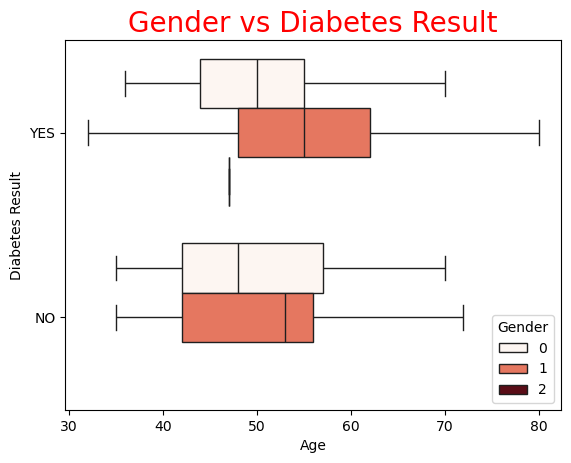

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(
    x="Age", 
    y="Diabetes Result", 
    data=df, 
    hue="Gender", 
    palette="Reds"
)

plt.title("Gender vs Diabetes Result", color="red", fontsize=20)
plt.show()

C:\Users\jagadeesh\AppData\Local\Temp\ipykernel_89344\4116965226.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


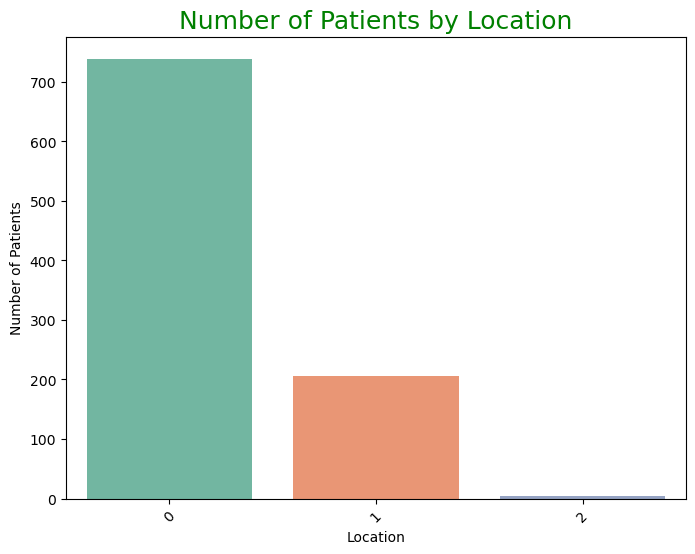

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Optional for better size

sns.countplot(
    x="Gender", 
    data=df, 
    palette="Set2"
)

plt.title("Number of Patients by Location", fontsize=18, color="green")
plt.xlabel("Location")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()

In [22]:
print(df.columns)

Index(['S.NO', 'Age', 'Gender', 'Place(location where the patient lives)',
       'Duration of alcohol consumption(years)',
       'Quantity of alcohol consumption (quarters/day)',
       'Type of alcohol consumed', 'Hepatitis B infection',
       'Hepatitis C infection', 'Diabetes Result', 'Blood pressure (mmhg)',
       'Obesity', 'Family history of cirrhosis/ hereditary', 'TCH', 'TG',
       'LDL', 'HDL', 'Hemoglobin  (g/dl)', 'PCV  (%)',
       'RBC  (million cells/microliter)', 'MCV   (femtoliters/cell)',
       'MCH  (picograms/cell)', 'MCHC  (grams/deciliter)', 'Total Count',
       'Polymorphs  (%) ', 'Lymphocytes  (%)', 'Monocytes   (%)',
       'Eosinophils   (%)', 'Basophils  (%)', 'Platelet Count  (lakhs/mm)',
       'Total Bilirubin    (mg/dl)', 'Direct    (mg/dl)',
       'Indirect     (mg/dl)', 'Total Protein     (g/dl)', 'Albumin   (g/dl)',
       'Globulin  (g/dl)', 'A/G Ratio', 'AL.Phosphatase      (U/L)',
       'SGOT/AST      (U/L)', 'SGPT/ALT (U/L)',
       'USG Ab

C:\Users\jagadeesh\AppData\Local\Temp\ipykernel_89344\3917281481.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


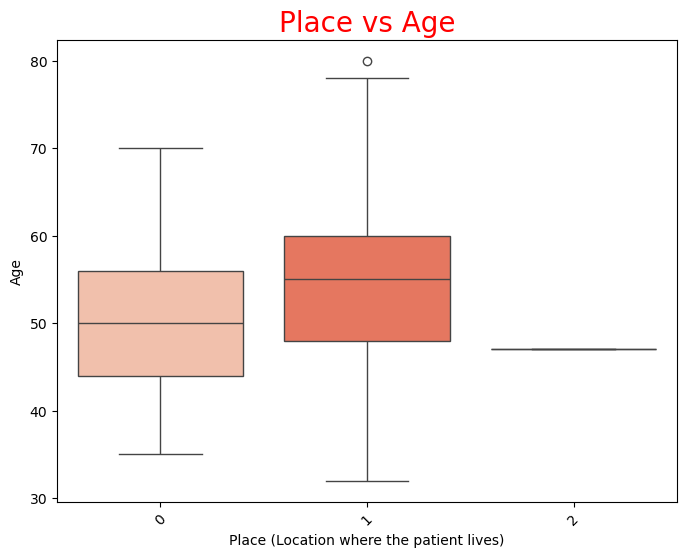

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

sns.boxplot(
    x="Gender",   
    y="Age",     
    data=df,     
    palette="Reds"
)

plt.title("Place vs Age", color="red", fontsize=20)
plt.xlabel("Place (Location where the patient lives)")
plt.ylabel("Age")
plt.xticks(rotation=45)
plt.show()


C:\Users\jagadeesh\AppData\Local\Temp\ipykernel_89344\2278278951.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


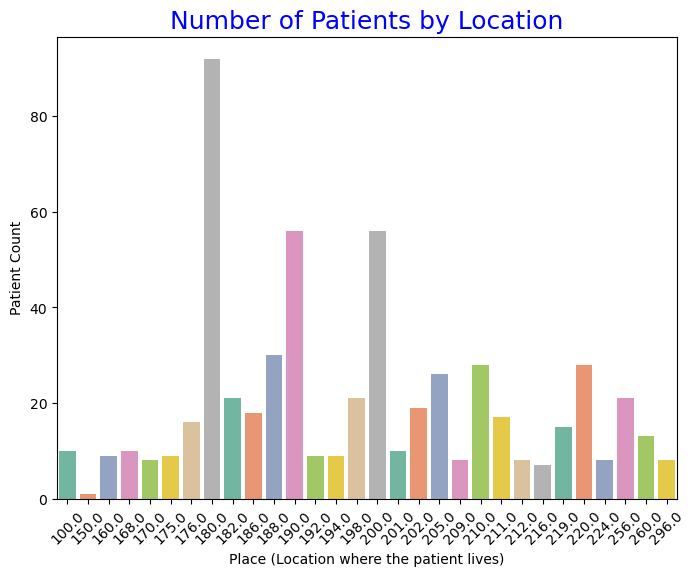

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Adjust figure size

sns.countplot(
    x="TCH",   # ✅ Replace 'Place' with your actual column name (e.g., 'Location')
    data=df,
    palette="Set2"
)

plt.title("Number of Patients by Location", fontsize=18, color="blue")
plt.xlabel("Place (Location where the patient lives)")
plt.ylabel("Patient Count")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()

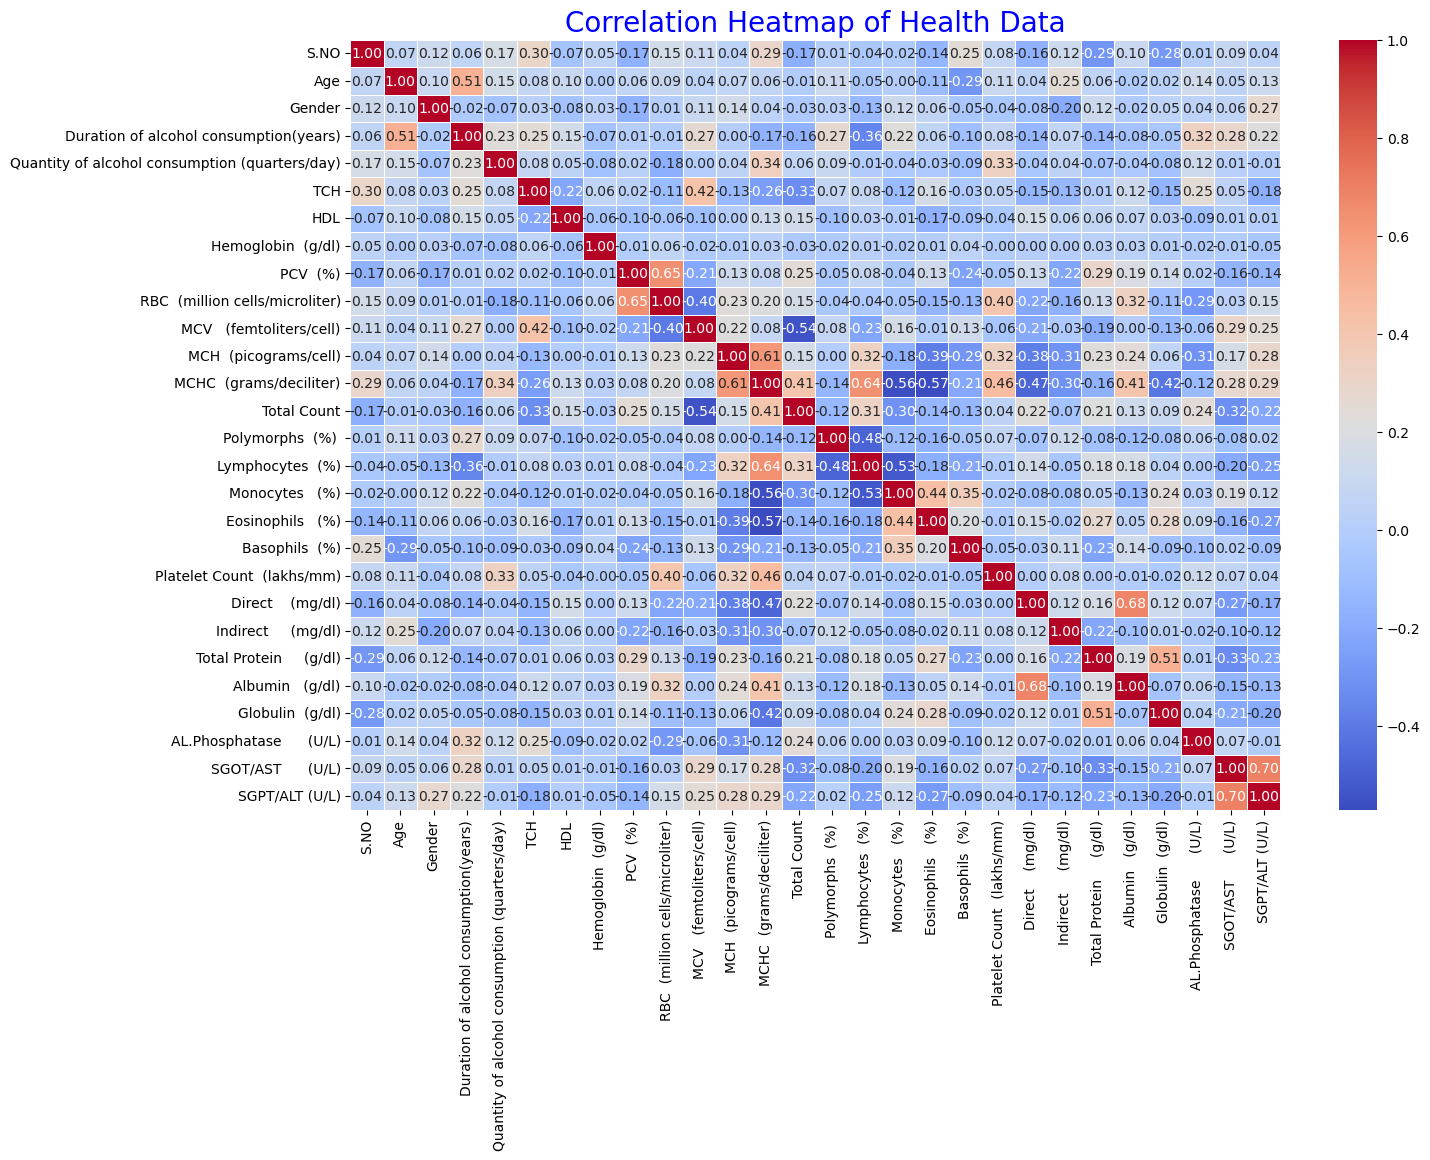

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))  # Larger figure for clarity

sns.heatmap(
    df.corr(numeric_only=True),   # Ensures only numeric columns
    annot=True,                   # Shows correlation numbers
    cmap="coolwarm",              # Color theme
    linewidths=0.5,               # Adds lines between cells
    fmt=".2f"                     # Format decimal numbers
)

plt.title("Correlation Heatmap of Health Data", fontsize=20, color="blue")
plt.show()

In [26]:
df.columns




Index(['S.NO', 'Age', 'Gender', 'Place(location where the patient lives)',
       'Duration of alcohol consumption(years)',
       'Quantity of alcohol consumption (quarters/day)',
       'Type of alcohol consumed', 'Hepatitis B infection',
       'Hepatitis C infection', 'Diabetes Result', 'Blood pressure (mmhg)',
       'Obesity', 'Family history of cirrhosis/ hereditary', 'TCH', 'TG',
       'LDL', 'HDL', 'Hemoglobin  (g/dl)', 'PCV  (%)',
       'RBC  (million cells/microliter)', 'MCV   (femtoliters/cell)',
       'MCH  (picograms/cell)', 'MCHC  (grams/deciliter)', 'Total Count',
       'Polymorphs  (%) ', 'Lymphocytes  (%)', 'Monocytes   (%)',
       'Eosinophils   (%)', 'Basophils  (%)', 'Platelet Count  (lakhs/mm)',
       'Total Bilirubin    (mg/dl)', 'Direct    (mg/dl)',
       'Indirect     (mg/dl)', 'Total Protein     (g/dl)', 'Albumin   (g/dl)',
       'Globulin  (g/dl)', 'A/G Ratio', 'AL.Phosphatase      (U/L)',
       'SGOT/AST      (U/L)', 'SGPT/ALT (U/L)',
       'USG Ab

In [27]:
df['Blood pressure (mmhg)']

0      138/90
1      138/90
2      138/90
3      138/90
4      138/90
        ...  
945    110/70
946    120/80
947    110/70
948    110/70
949    110/70
Name: Blood pressure (mmhg), Length: 950, dtype: object

In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split

# Example dataset
df = pd.read_excel(r'C:\Users\jagadeesh\Desktop\Liver-Cirrhosis-Stage-Prediction-main\HealthCareData.xlsx')  # or read_excel()
print(df.info())

for i in df['Blood pressure (mmhg)']:
    
    print(i)
    j = i.split('/')
    print(i)
    systole = int(j[0])
    diastole = int(j[1])
    # interpreting the systole and diastole values
    if((systole<120) and (diastole<80)):
        df['Blood pressure (mmhg)'] = df['Blood pressure (mmhg)'].replace(i,0)

    elif ((systole>=120 and systole<130) and (diastole<80)):
        df['Blood pressure (mmhg)'] = df['Blood pressure (mmhg)'].replace(i,1)
    
    elif ((systole>=130 and systole<140) or (diastole>=80 and diastole<=89)):
        df['Blood pressure (mmhg)'] = df['Blood pressure (mmhg)'].replace(i,1)
    
    else:
        df['Blood pressure (mmhg)'] = df['Blood pressure (mmhg)'].replace(i,1)






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 42 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   S.NO                                                                     950 non-null    int64  
 1   Age                                                                      950 non-null    int64  
 2   Gender                                                                   950 non-null    object 
 3   Place(location where the patient lives)                                  816 non-null    object 
 4   Duration of alcohol consumption(years)                                   950 non-null    int64  
 5   Quantity of alcohol consumption (quarters/day)                           950 non-null    int64  
 6   Type of alcohol consumed                                                 9

C:\Users\jagadeesh\AppData\Local\Temp\ipykernel_82836\1914979656.py:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Blood pressure (mmhg)'] = df['Blood pressure (mmhg)'].replace(i,1)


In [2]:
df['Blood pressure (mmhg)']

0      1
1      1
2      1
3      1
4      1
      ..
945    0
946    1
947    0
948    0
949    0
Name: Blood pressure (mmhg), Length: 950, dtype: int64

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Copy original DataFrame for processing
df_processed = df.copy()

# Identify object columns (categorical data)
object_columns = df_processed.select_dtypes(include=['object']).columns

# Apply Label Encoding to each categorical column
label_encoders = {}
for col in object_columns:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col].astype(str))
    label_encoders[col] = le  # Save encoders for possible inverse transform

# Now apply Min-Max normalization to the entire DataFrame
scaler_full = MinMaxScaler()
normalized_full_data = scaler_full.fit_transform(df_processed)

# Create a normalized DataFrame
normalized_full_df = pd.DataFrame(normalized_full_data, columns=df_processed.columns)

normalized_full_df.head()

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
0,0.000000,0.479167,0.666667,0.666667,0.195122,0.005587,0.666667,0.5,0.5,1.0,...,0.4375,0.603448,0.099526,0.103448,0.25,0.626667,0.139535,0.056995,0.0,0.0
1,0.001054,0.479167,0.666667,0.666667,0.195122,0.005587,0.666667,0.5,0.5,1.0,...,0.4375,0.603448,0.099526,0.103448,0.25,0.626667,0.139535,0.056995,0.0,0.0
2,0.002107,0.479167,0.666667,0.666667,0.195122,0.005587,0.666667,0.5,0.5,1.0,...,0.4375,0.603448,0.099526,0.103448,0.25,0.626667,0.139535,0.056995,0.0,0.0
3,0.003161,0.479167,0.666667,0.666667,0.195122,0.005587,0.666667,0.5,0.5,0.0,...,0.4375,0.603448,0.099526,0.103448,0.25,0.626667,0.139535,0.056995,0.0,0.0
4,0.004215,0.479167,0.000000,0.666667,0.195122,0.005587,0.666667,0.5,0.5,1.0,...,0.4375,0.603448,0.099526,0.103448,0.25,0.626667,0.139535,0.056995,0.0,0.0


In [4]:
normalized_full_df = normalized_full_df.fillna(method='ffill')
#normalized_full_df = normalized_full_df[normalized_full_df.isna()].fillna(0)
normalized_full_df.isnull().sum()

C:\Users\jagadeesh\AppData\Local\Temp\ipykernel_82836\3819713346.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  normalized_full_df = normalized_full_df.fillna(method='ffill')


S.NO                                                                         0
Age                                                                          0
Gender                                                                       0
Place(location where the patient lives)                                      0
Duration of alcohol consumption(years)                                       0
Quantity of alcohol consumption (quarters/day)                               0
Type of alcohol consumed                                                     0
Hepatitis B infection                                                        0
Hepatitis C infection                                                        0
Diabetes Result                                                              0
Blood pressure (mmhg)                                                        0
Obesity                                                                      0
Family history of cirrhosis/ hereditary             

In [5]:
from sklearn.preprocessing import LabelEncoder



le = LabelEncoder()
# Define features and target
X = normalized_full_df.drop(['Diabetes Result','MCH  (picograms/cell)','MCHC  (grams/deciliter)'], axis=1)

y = normalized_full_df['Diabetes Result']

# Split the data
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Check
print("Training Features Shape:", x_train.shape)
print("Testing Features Shape:", x_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)

Training Features Shape: (760, 39)
Testing Features Shape: (190, 39)
Training Labels Shape: (760,)
Testing Labels Shape: (190,)


In [6]:
normalized_full_df['Diabetes Result'].unique()

array([1., 0.])

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
x_train
y_train

936    0.0
290    1.0
544    0.0
275    1.0
109    1.0
      ... 
106    1.0
270    1.0
860    1.0
435    1.0
102    1.0
Name: Diabetes Result, Length: 760, dtype: float64

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
rf_Acc = accuracy_score(y_test, y_pred)*100
rf_Acc

85.78947368421052

In [16]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
x_train = x_train.fillna(x_train.mean()) 
logistic=log.fit(x_train,y_train)
y_pred = logistic.predict(x_test)
lr_Acc = accuracy_score(y_test, y_pred)*100
lr_Acc

81.57894736842105

In [31]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=5, random_state=0).fit(x_train,y_train)
y_pred = clf.predict(x_test)
#clf.predict_proba(X[:2, :]).shape

lrcv_acc = accuracy_score(y_test, y_pred)*100
lrcv_acc

80.52631578947368

In [21]:
from sklearn.neighbors import KNeighborsClassifier


knnClassifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)

#knn_model = Pipeline(steps=[(‘preprocessor’, preprocessorForFeatures), (‘classifier’ , knnClassifier)])

knnClassifier.fit(x_train, y_train)

y_pred = knnClassifier.predict(x_test)
knn_Acc = accuracy_score(y_test, y_pred)*100
knn_Acc

86.8421052631579

In [25]:
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(x_train,y_train)
y_pred = xgbc.predict(x_test)
xgb_Acc = accuracy_score(y_test, y_pred)*100
xgb_Acc

85.26315789473684

In [26]:
from sklearn.linear_model import RidgeClassifier
RC = RidgeClassifier()
RC.fit(x_train,y_train)
y_pred = RC.predict(x_test)
RC_Acc = accuracy_score(y_test, y_pred)*100
RC_Acc

81.57894736842105

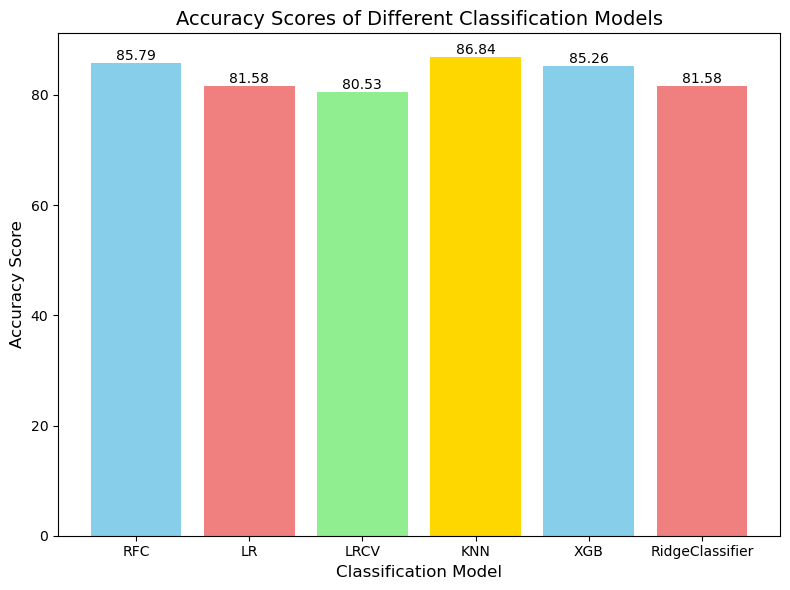

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Prepare your data
# Example: Accuracy scores for different classification models
models = ['RFC','LR','LRCV','KNN','XGB','RidgeClassifier']
accuracy_scores = [rf_Acc, lr_Acc, lrcv_acc, knn_Acc, xgb_Acc, RC_Acc]

# 2. Create the bar plot
plt.figure(figsize=(8, 6)) # Optional: Adjust figure size for better readability
plt.bar(models, accuracy_scores, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])

# 3. Add labels and title for clarity
plt.xlabel('Classification Model', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.title('Accuracy Scores of Different Classification Models', fontsize=14)
# Set y-axis limits to represent accuracy scores (0 to 1)

# Optional: Add accuracy values on top of the bars
for i, score in enumerate(accuracy_scores):
    plt.text(i, score + 0.01, f'{score:.2f}', ha='center', va='bottom', fontsize=10)


plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()